#### Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#### Load the dataset

In [2]:
covid_df = pd.read_csv('covid_19_india.csv')
covid_df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


#### Display data information

In [3]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


#### Check for null values

In [4]:
covid_df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

#### Check for duplicates

In [5]:
covid_df.duplicated().sum()

0

#### Drop unnecessary columns

In [6]:
covid_df.drop(['Sno', 'ConfirmedIndianNational', 'ConfirmedForeignNational'], axis = 1, inplace = True)

#### Add a new column named 'active'

In [7]:
covid_df['Active'] = covid_df['Confirmed'] - (covid_df['Cured'] + covid_df['Deaths'])

#### Rename 'State/UnionTerritory' column

In [8]:
covid_df.rename(columns = {'State/UnionTerritory' : 'State'}, inplace = True)

#### Generate descriptive statistics 

In [9]:
covid_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Cured,18110.0,278637.518056,614890.894424,0.0,3360.25,33364.0,278869.75,6159676.0
Deaths,18110.0,4052.402264,10919.076411,0.0,32.00,588.0,3643.75,134201.0
Confirmed,18110.0,301031.401822,656148.872965,0.0,4376.75,39773.5,300149.75,6363442.0
Active,18110.0,18341.481502,52896.528487,-9368.0,322.00,2305.5,12454.75,701614.0


#### Change 'Date' column from object format to datetime format

In [10]:
covid_df['Date'] = pd.to_datetime(covid_df['Date'], format = '%Y-%m-%d')

#### Calculate total confirmed cases

In [11]:
np.sum(covid_df['Confirmed'])

5451678687

#### Calculate total deaths cases

In [12]:
np.sum(covid_df['Deaths'])

73389005

#### Calculate total cured cases

In [13]:
np.sum(covid_df['Cured'])

5046125452

#### Calculate total active cases

In [14]:
np.sum(covid_df['Active'])

332164230

#### Create a pivot table

In [15]:
statewise = pd.pivot_table(covid_df, values = ['Confirmed', 'Cured', 'Deaths'],  index = 'State', aggfunc = max)

#### Add a new columns to the pivot table named 'Recovery Rate' and Mortality Rate'

In [16]:
statewise['Recovery Rate'] = statewise['Cured']/statewise['Confirmed']*100
statewise['Mortality Rate'] = statewise['Deaths']/statewise['Confirmed']*100

#### Sort the data

In [17]:
statewise = statewise.sort_values(by = 'Confirmed', ascending = False)

#### Color cells based on the values they contain using a gradient

In [18]:
statewise.style.background_gradient(cmap = 'cubehelix')

,Confirmed,Cured,Deaths,Recovery Rate,Mortality Rate
State,,,,,
Maharashtra,6363442,6159676,134201,96.797865,2.108937
Maharashtra***,6229596,6000911,130753,96.329056,2.098900
Kerala,3586693,3396184,18004,94.688450,0.501967
Karnataka,2921049,2861499,36848,97.961349,1.261465
Karanataka,2885238,2821491,36197,97.790581,1.254559
Tamil Nadu,2579130,2524400,34367,97.877967,1.332504
Andhra Pradesh,1985182,1952736,13564,98.365591,0.683262
Uttar Pradesh,1708812,1685492,22775,98.635309,1.332797
West Bengal,1534999,1506532,18252,98.145471,1.189056


#### Group the data based on the 'State' column and sort it based on the 'Active' column within each group

In [36]:
top_active = covid_df.groupby(by = 'State').max()[['Active', 'Date']].sort_values(by = 'Active', ascending = False).reset_index()

#### 1. Creates a bar plot to visualize the top 10 states with the most active COVID-19 cases

Text(0, 0.5, 'Total Active Cases')

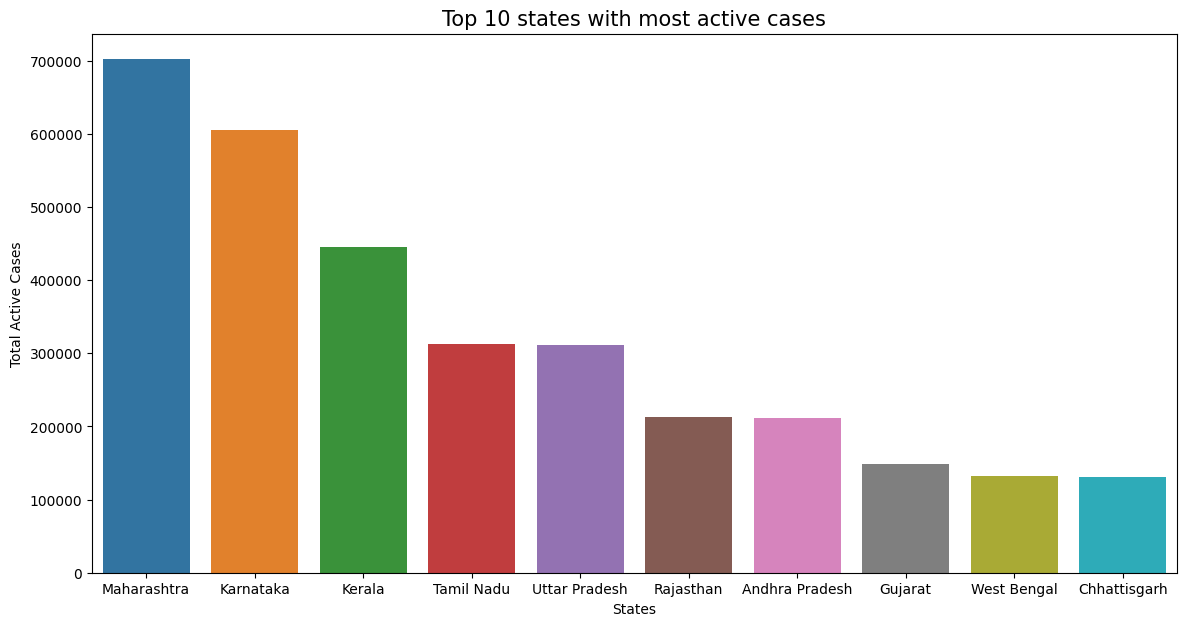

In [41]:
plt.figure(figsize = (14,7))
plt.title('Top 10 states with most active cases', size = 15)
sns.barplot(data = top_active.iloc[:10], y = 'Active', x = 'State')
plt.xlabel('States')
plt.ylabel('Total Active Cases')

#### Group the data based on the 'State' column and sort it based on the 'Deaths' column within each group

In [42]:
top_death = covid_df.groupby(by = 'State').max()[['Deaths', 'Date']].sort_values(by = 'Deaths', ascending = False).reset_index()

#### 2. Create a bar plot to visualize the top 10 states with the most COVID-19 deaths

Text(0, 0.5, 'Total Death')

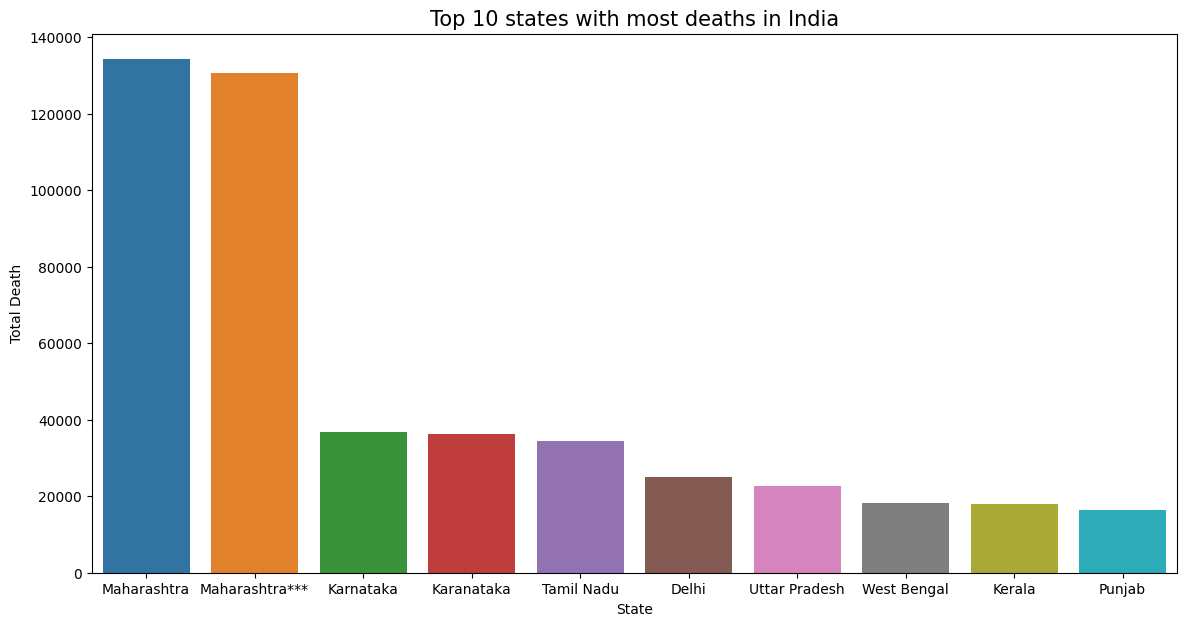

In [44]:
plt.figure(figsize = (14,7))
plt.title('Top 10 states with most deaths in India', size = 15)
sns.barplot(data = top_death.iloc[:10], x = 'State', y = 'Deaths')
plt.xlabel('State')
plt.ylabel('Total Death')

#### 3. Creates a line plot to visualize the trend of active COVID-19 cases over time for the top 5 affected states (Maharashtra, Karnataka, Kerala, Tamil Nadu, and Uttar Pradesh)

<Axes: title={'center': 'Top 5 affected states in India'}, xlabel='Date', ylabel='Active'>

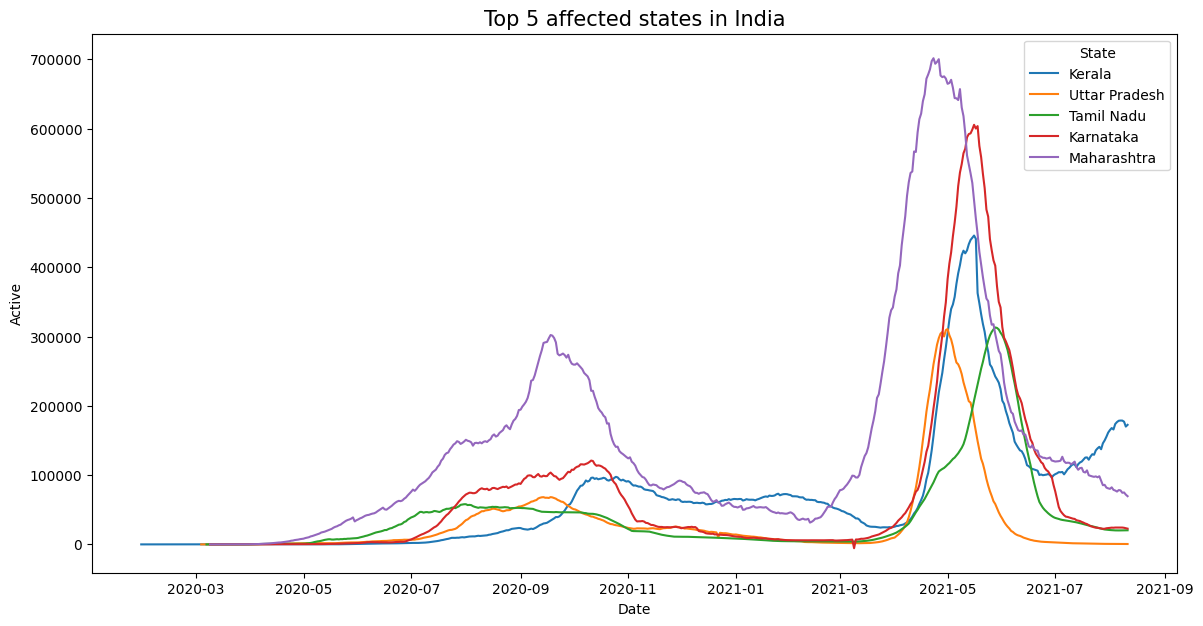

In [33]:
plt.figure(figsize = (14,7))
plt.title('Top 5 affected states in India', size = 15)
sns.lineplot(data = covid_df[covid_df['State'].isin(['Maharashtra', 'Karnataka', 'Kerala', 'Tamil Nadu', 'Uttar Pradesh'])], x = 'Date', y = 'Active', hue = 'State')

#### Load the second dataset

In [19]:
vaccine_df = pd.read_csv('covid_vaccine_statewise.csv')
vaccine_df.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


#### Drop unnecessary columns

In [20]:
vaccine = vaccine_df.drop(columns = ['Sputnik V (Doses Administered)', 'AEFI', '18-44 Years (Doses Administered)', '45-60 Years (Doses Administered)', '60+ Years (Doses Administered)'], axis = 1)

#### Rename 'Updated On' and 'Total Individuals Vaccinated' columns

In [21]:
vaccine_df.rename(columns={'Updated On': 'Vaccine Date', 'Total Individuals Vaccinated': 'Total'}, inplace=True)

#### Calculates the total number of individuals vaccinated (Male and Female)

In [22]:
Male = vaccine['Male(Individuals Vaccinated)'].sum()
Female = vaccine['Female(Individuals Vaccinated)'].sum()

#### 4. Create a pie chart, representing the total number of vaccinated males and females, respectively

In [31]:
px.pie(values = [Male,Female], names = ['Male','Female'], title = 'Male vs Female Vaccinated')

#### Filter vaccine data by excluding rows that contain 'India' in the 'State' column

In [24]:
vaccine = vaccine_df[vaccine_df.State != 'India']

#### Calculate the top 5 states with the highest total vaccinations

In [25]:
max = vaccine.groupby(by = 'State')['Total'].sum().to_frame('Total')
max = max.sort_values('Total', ascending = False)[:5]

#### 5. Creates a bar plot to visualize the top 5 states in India with the highest total vaccinations

<Axes: title={'center': 'Top 5 vaccinated states in India'}, xlabel='State', ylabel='Total'>

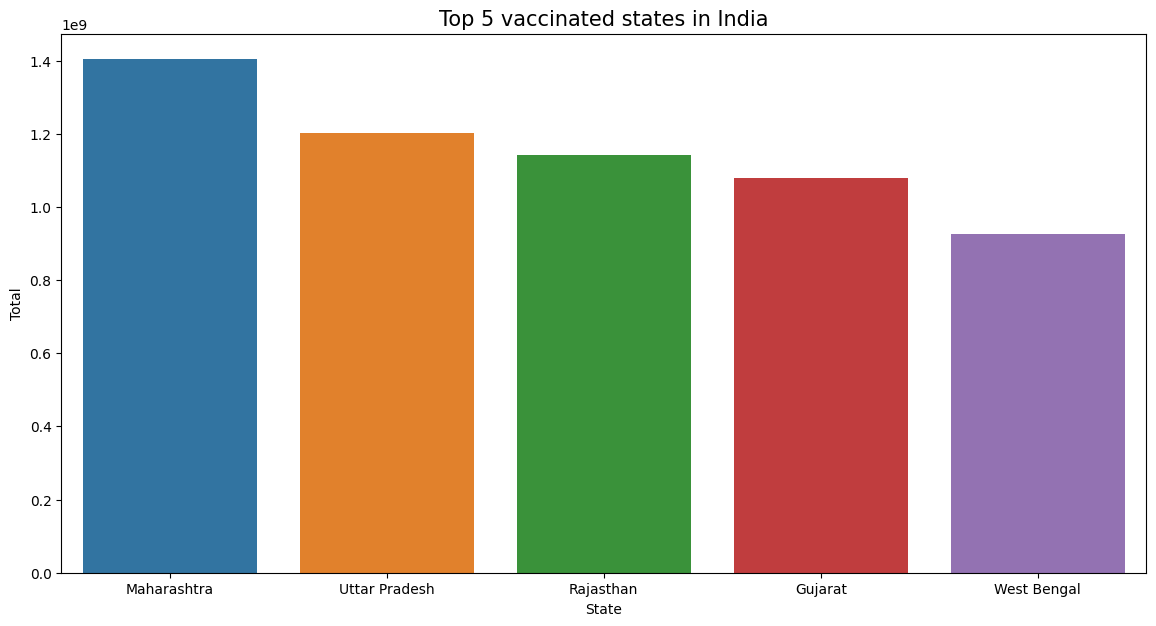

In [34]:
plt.figure(figsize = (14,7))
plt.title('Top 5 vaccinated states in India', size = 15)
sns.barplot(data = max.iloc[:5], x = max.index, y = max.Total)

#### Calculate the bottom 5 states with the lowest total vaccinations

In [35]:
min = vaccine.groupby(by = 'State')['Total'].sum().to_frame('Total')
min = min.sort_values('Total', ascending = True)[:5]
min = min.sort_values('Total', ascending =  False)

#### 6. Creates a bar plot to visualize the bottom 5 states in India with the lowest total vaccinations

<Axes: title={'center': 'Least 5 vaccinated states in India'}, xlabel='State', ylabel='Total'>

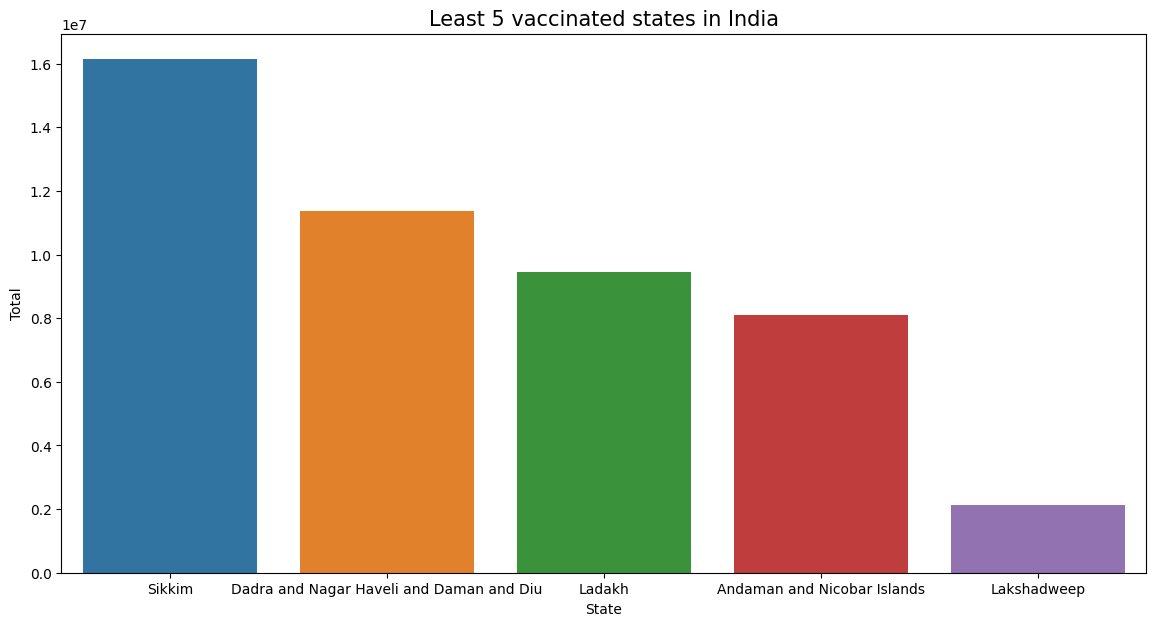

In [36]:
plt.figure(figsize = (14,7))
plt.title('Least 5 vaccinated states in India', size = 15)
sns.barplot(data = min.iloc[:5], x = min.index, y = min.Total)